No fim de 2019, o Novo Coronavírus foi nomeado como SARS-CoV-2. Este virus produz  a  doença  classificada  como  COVID-19,  sendo  agente  causador  de  uma  série  de  casos  de pneumonia. O  vírus tem alta transmissibilidade e provoca uma síndrome respiratória aguda que varia de casos leves – cerca de 80% – a casos muito graves com insuficiência respiratória –entre 5% e 10% dos casos. O primeiro caso registrado no brasil ocorreu em 26/02/2020, em SP, em exame realizado no Hospital Israelita Albert Einstein.

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Carregando dados
data = pd.read_excel('dataset.xlsx')

In [3]:
#Verificando as 5 primeiras linhas
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Retirando coluna ID
data.drop(columns = ('Patient ID'), axis = 1, inplace = True)

In [5]:
#Verificando quantidade de valores NaN
for i in data.columns:
    x= data[i].isna().sum()
    print(i , x)

Patient age quantile 0
SARS-Cov-2 exam result 0
Patient addmited to regular ward (1=yes, 0=no) 0
Patient addmited to semi-intensive unit (1=yes, 0=no) 0
Patient addmited to intensive care unit (1=yes, 0=no) 0
Hematocrit 5041
Hemoglobin 5041
Platelets 5042
Mean platelet volume  5045
Red blood Cells 5042
Lymphocytes 5042
Mean corpuscular hemoglobin concentration (MCHC) 5042
Leukocytes 5042
Basophils 5042
Mean corpuscular hemoglobin (MCH) 5042
Eosinophils 5042
Mean corpuscular volume (MCV) 5042
Monocytes 5043
Red blood cell distribution width (RDW) 5042
Serum Glucose 5436
Respiratory Syncytial Virus 4290
Influenza A 4290
Influenza B 4290
Parainfluenza 1 4292
CoronavirusNL63 4292
Rhinovirus/Enterovirus 4292
Mycoplasma pneumoniae 5644
Coronavirus HKU1 4292
Parainfluenza 3 4292
Chlamydophila pneumoniae 4292
Adenovirus 4292
Parainfluenza 4 4292
Coronavirus229E 4292
CoronavirusOC43 4292
Inf A H1N1 2009 4292
Bordetella pertussis 4292
Metapneumovirus 4292
Parainfluenza 2 4292
Neutrophils 5131
Ur

In [6]:
#Verificar e retirar os valores sem informações
for i in data.columns:
    x= data[i].isna().sum()
    if x == 5644:
        print(i , x)

Mycoplasma pneumoniae 5644
Urine - Sugar 5644
Partial thromboplastin time (PTT)  5644
Prothrombin time (PT), Activity 5644
D-Dimer 5644


In [7]:
#Deletando as colunas que não possuem informações úteis para nós
data.drop(columns = [('Mycoplasma pneumoniae'),('Urine - Sugar'),('D-Dimer'),('Prothrombin time (PT), Activity'),('Patient addmited to intensive care unit (1=yes, 0=no)'),('Patient addmited to semi-intensive unit (1=yes, 0=no)'),('Patient addmited to regular ward (1=yes, 0=no)')], axis = 1, inplace = True)


In [8]:
# Segundo menor dados faltantes
for i in data.columns:
    x= data[i].isna().sum()
    if x == 4292:
        print(i , x)

Parainfluenza 1 4292
CoronavirusNL63 4292
Rhinovirus/Enterovirus 4292
Coronavirus HKU1 4292
Parainfluenza 3 4292
Chlamydophila pneumoniae 4292
Adenovirus 4292
Parainfluenza 4 4292
Coronavirus229E 4292
CoronavirusOC43 4292
Inf A H1N1 2009 4292
Bordetella pertussis 4292
Metapneumovirus 4292
Parainfluenza 2 4292


In [9]:
#Menos dados faltantes
for i in data.columns:
    x= data[i].isna().sum()
    if x == 4290:
        print(i , x)

Respiratory Syncytial Virus 4290
Influenza A 4290
Influenza B 4290


In [10]:
for i in data.columns:
    x= data[i].isna().sum()
    if x == 5041:
        print(i , x)

Hematocrit 5041
Hemoglobin 5041


In [11]:
for i in data.columns:
    x= data[i].isna().sum()
    if x == 5042:
        print(i , x)

Platelets 5042
Red blood Cells 5042
Lymphocytes 5042
Mean corpuscular hemoglobin concentration (MCHC) 5042
Leukocytes 5042
Basophils 5042
Mean corpuscular hemoglobin (MCH) 5042
Eosinophils 5042
Mean corpuscular volume (MCV) 5042
Red blood cell distribution width (RDW) 5042


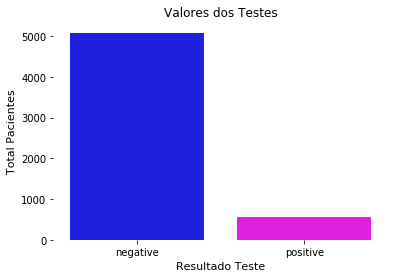

In [12]:
#Verificando o balanceamento
sns.countplot(data['SARS-Cov-2 exam result'], palette = ['#0000FF', '#FF00FF'])
plt.box(False)
plt.xlabel('Resultado Teste', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Valores dos Testes')
plt.show()

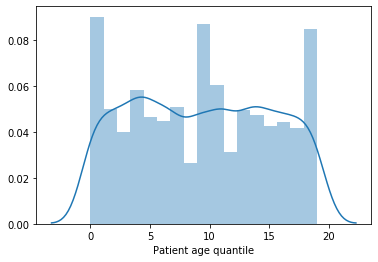

In [13]:
#Verificando a variavel age
sns.distplot(data['Patient age quantile'])

In [14]:
# Extraindo variáveis do tipo categóricas
dfcatname = data.dtypes[data.dtypes == 'object'].index
dfcatname

Index(['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

In [15]:
data[dfcatname].head()

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,...,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
0,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data[dfcatname].describe()

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,...,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
count,5644,1354,1354,1354,1352,1352,1352,1352,1352,1352,...,57,1,69,60,70,70,67,69,70,70
unique,2,2,2,2,2,2,2,2,2,2,...,2,1,2,2,31,5,1,1,1,4
top,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,...,absent,not_done,normal,absent,3000,Ausentes,absent,absent,absent,yellow
freq,5086,1302,1336,1277,1349,1307,973,1332,1342,1343,...,56,1,68,59,9,65,67,69,70,55


In [17]:
non_num_cols = data.select_dtypes(['object']).columns
non_num_cols

for name in non_num_cols:
    data[name] = data[name].astype('category')

data[non_num_cols] = data[non_num_cols].apply(lambda x: x.cat.codes)

In [18]:
X = data.drop(columns = ('SARS-Cov-2 exam result'))
Y = data['SARS-Cov-2 exam result']

In [19]:
X.shape,Y.shape

((5644, 102), (5644,))

In [20]:
# DataFrame com dados com maior quantidade de informações
data2 = pd.DataFrame(data, columns = ['Patient age quantile', 'Parainfluenza','CoronavirusNL63','Rhinovirus/Enterovirus','Coronavirus HKU1','Chlamydophila pneumoniae','Adenovirus','Coronavirus229E','CoronavirusOC43','Inf A H1N1','Bordetella pertussis','Metapneumovirus','Respiratory Syncytial Virus','Influenza A','Influenza B','Hematocrit','Hemoglobin','Platelets','Red blood Cells', 'Lymphocytes','Mean corpuscular hemoglobin concentration (MCHC)','Leukocytes','Basophils','Mean corpuscular hemoglobin (MCH)', 
'Eosinophils','Mean corpuscular volume (MCV)','Red blood cell distribution width (RDW)', 'SARS-Cov-2 exam result'])

In [21]:
data2.head()

,Patient age quantile,Parainfluenza,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Chlamydophila pneumoniae,Adenovirus,Coronavirus229E,CoronavirusOC43,Inf A H1N1,...,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Red blood cell distribution width (RDW),SARS-Cov-2 exam result
0,13,NaN,-1,-1,-1,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,NaN,1,0,1,1,1,1,1,NaN,...,0.102004,0.318366,NaN,-0.09461,-0.223767,-0.292269,1.482158,0.166192,-0.625073,0
2,8,NaN,-1,-1,-1,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,NaN,-1,-1,-1,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,NaN,1,0,1,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
data2.fillna('NaoRealizado', inplace = True)

In [23]:
# Extraindo variáveis do tipo categóricas
dfcatname = data2.dtypes[data2.dtypes == 'object'].index
dfcatname

Index(['Parainfluenza', 'Inf A H1N1', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [24]:
non_num_cols = data2.select_dtypes(['object']).columns
non_num_cols

for name in non_num_cols:
    data2[name] = data2[name].astype('category')

data2[non_num_cols] = data2[non_num_cols].apply(lambda x: x.cat.codes)

In [25]:
data2.drop(columns = [('Mean corpuscular hemoglobin concentration (MCHC)'), ('Parainfluenza'),('Inf A H1N1')], axis = 1, inplace = True)

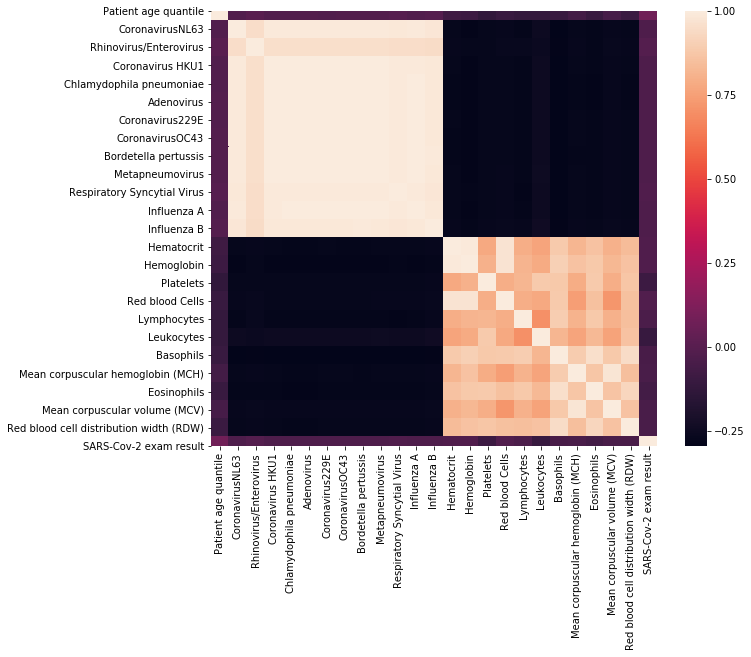

In [26]:
#Verificando as correlações
plt.figure(figsize= (10,8))
corr = data2.corr()
sns.heatmap(corr)

In [27]:
# Verificando a importância dos Atributos com o Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

X2 = data2.drop(columns = ('SARS-Cov-2 exam result'))
Y2 = data2['SARS-Cov-2 exam result']

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X2, Y2)


# Print dos Resultados
print(data2.columns)
print(modelo.feature_importances_)



Index(['Patient age quantile', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Chlamydophila pneumoniae', 'Adenovirus',
       'Coronavirus229E', 'CoronavirusOC43', 'Bordetella pertussis',
       'Metapneumovirus', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Red blood Cells', 'Lymphocytes', 'Leukocytes', 'Basophils',
       'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)',
       'Red blood cell distribution width (RDW)', 'SARS-Cov-2 exam result'],
      dtype='object')
[0.21417962 0.01331736 0.02935436 0.00469447 0.00226942 0.00291984
 0.0059421  0.00330867 0.00261294 0.00408024 0.00370785 0.0043256
 0.01422616 0.05060452 0.04857636 0.09334649 0.05525927 0.05112587
 0.13282069 0.05130504 0.04403015 0.07174686 0.04921777 0.04702835]


In [28]:
feature_imp = pd.Series(modelo.feature_importances_,index=X2.columns).sort_values(ascending=False)

In [29]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index )

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()


Verificando as variáveis com maior importância na predição da doença. Percebemos que a idade possui uma peso grande, como era o esperado, seguida de leucócitos e plaquetas.

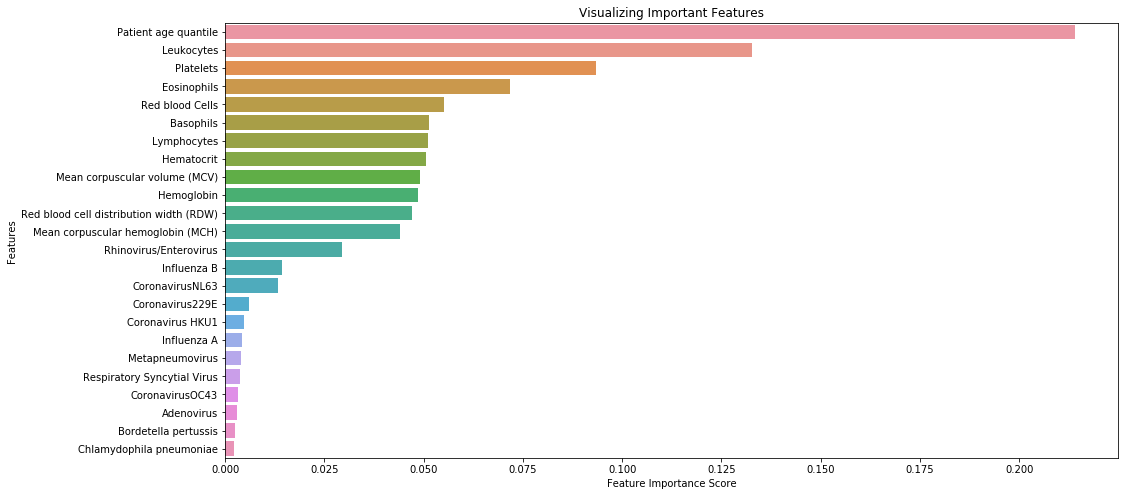

In [30]:
#Verificando os pesos de cada variável na predição
plt.figure(figsize= (10,8))
visualiza_features_importantes(feature_imp)

In [31]:
feature_imp

Patient age quantile                       0.214180
Leukocytes                                 0.132821
Platelets                                  0.093346
Eosinophils                                0.071747
Red blood Cells                            0.055259
Basophils                                  0.051305
Lymphocytes                                0.051126
Hematocrit                                 0.050605
Mean corpuscular volume (MCV)              0.049218
Hemoglobin                                 0.048576
Red blood cell distribution width (RDW)    0.047028
Mean corpuscular hemoglobin (MCH)          0.044030
Rhinovirus/Enterovirus                     0.029354
Influenza B                                0.014226
CoronavirusNL63                            0.013317
Coronavirus229E                            0.005942
Coronavirus HKU1                           0.004694
Influenza A                                0.004326
Metapneumovirus                            0.004080
Respiratory 

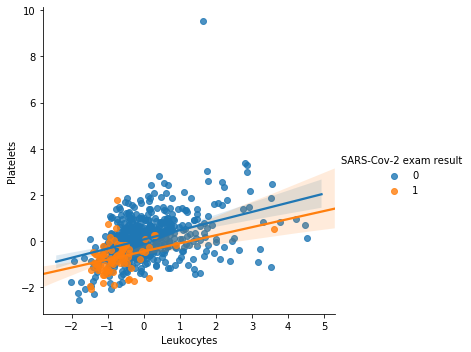

In [32]:
# Usando mais de 2 variáveis
sns.lmplot(x = "Leukocytes", y = "Platelets", hue = "SARS-Cov-2 exam result", data = data);

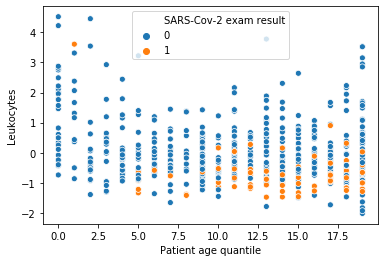

In [33]:
# barplot
sns.scatterplot(x = "Patient age quantile",y = "Leukocytes", hue = "SARS-Cov-2 exam result", data = data);

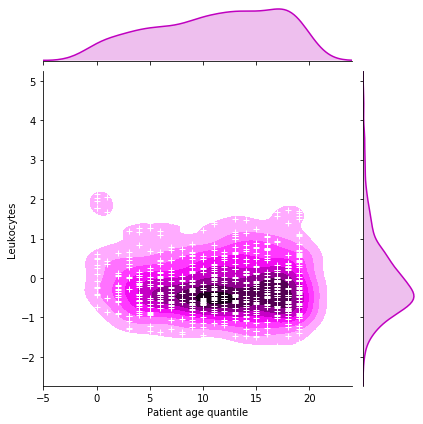

In [34]:
# Distribuição bivariada
g = sns.jointplot(x = "Patient age quantile", y = "Leukocytes", data = data, kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);

In [35]:
#Limitando as variáveis para observar o comportamento.
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if   importancia > 0.05 :
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

Patient age quantile:	0.21417961777203798
Leukocytes:	0.13282069124715498
Platelets:	0.09334648708424594
Eosinophils:	0.07174685740362913
Red blood Cells:	0.055259269854831504
Basophils:	0.05130504479086089
Lymphocytes:	0.05112587287661215
Hematocrit:	0.05060451876885377


In [36]:
X_over =  X2[features_selecionadas]
Y_over =  Y2

In [37]:
X_over.shape,Y_over.shape

((5644, 8), (5644,))

In [38]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

X_over, Y_over = make_classification()

print('Original dataset shape %s' % Counter(Y_over))


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_over, Y_over)
print('Resampled dataset shape %s' % Counter(y_res))


Using TensorFlow backend.


Original dataset shape Counter({0: 50, 1: 50})
Resampled dataset shape Counter({0: 50, 1: 50})


In [39]:
X_res.shape,y_res.shape

((100, 20), (100,))

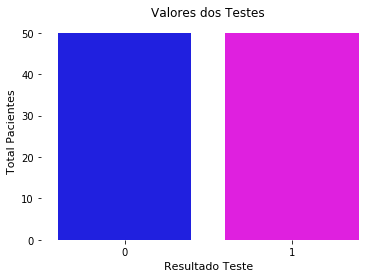

In [40]:
#Verificando o balanceamento
sns.countplot(y_res, palette = ['#0000FF', '#FF00FF'])
plt.box(False)
plt.xlabel('Resultado Teste', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Valores dos Testes')
plt.show()

In [41]:
#Separando dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size=0.2,
    random_state=42
)


TASK 1

Após análise e tratamento, utilizamos o algoritmo SVC para predição.


In [42]:
#Verificando predição da doença em SVC
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

clf = SVC(C = .010, gamma = .01, kernel = 'linear',probability=True)
clf.fit(X_train, y_train)
resultado_svc = clf.predict(X_test)
score = roc_auc_score(y_test, resultado_svc)
score
print(classification_report(y_test,resultado_svc))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


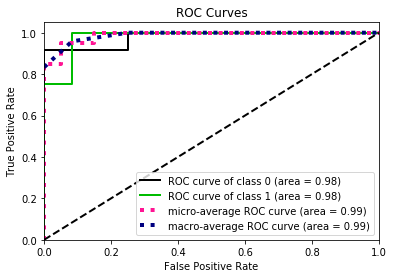

In [45]:
 import scikitplot as skplt
# Calcula a Curva ROC para cada classe
y_probs_v1 = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probs_v1)
plt.show()

Agora utilizamos o algoritmo XGBoost para predição. Como possuimos poucos dados, há grande chance de ocorrer overfitting.

In [46]:
#Utilizando XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

modelo_xg = xgb.XGBClassifier(learning_rate = 0.1, 
                              max_depth = 3, 
                              n_estimators = 1000,
                             min_child_weight = 5,
                             gamma = 0.1,
                             reg_alpha=1,
                            reg_lambda=1.5)
modelo_xg.fit(X_train,y_train)    
resultado2 = modelo_xg.predict_proba(X_test)[:,1]
valores_previstos2 = modelo_xg.predict(X_test)
score = roc_auc_score(y_test, resultado2)
score

0.9947916666666666

In [47]:
print(classification_report(y_test,valores_previstos2))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


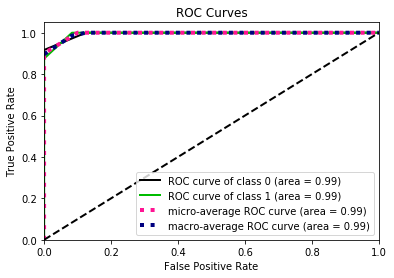

In [48]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_xg.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probs_v1)
plt.show()